# Handwritten digit recognition

This project uses a Kaggle dataset that can be found at https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("train 2.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# define the usual helper functions

def get_normalized_data():
    print("Reading in and transforming data...")

    df = pd.read_csv('train 2.csv')
    data = df.values.astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = data[:, 0]

    Xtrain = X[:-1000]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:]
    Ytest  = Y[-1000:]

    # normalize the data
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    np.place(std, std == 0, 1)
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    
    return Xtrain, Xtest, Ytrain, Ytest


def forward(X, W, b):
    # softmax
    a = X.dot(W) + b
    expa = np.exp(a)
    y = expa / expa.sum(axis=1, keepdims=True)
    return y


def predict(p_y):
    return np.argmax(p_y, axis=1)


def error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(prediction != t)


def cost(p_y, t):
    tot = t * np.log(p_y)
    return -tot.sum()


def gradW(t, y, X):
    return X.T.dot(t - y)


def gradb(t, y):
    return (t - y).sum(axis=0)


def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

## Logistic regression with mini-batches

Reading in and transforming data...
Final error rate: 0.083


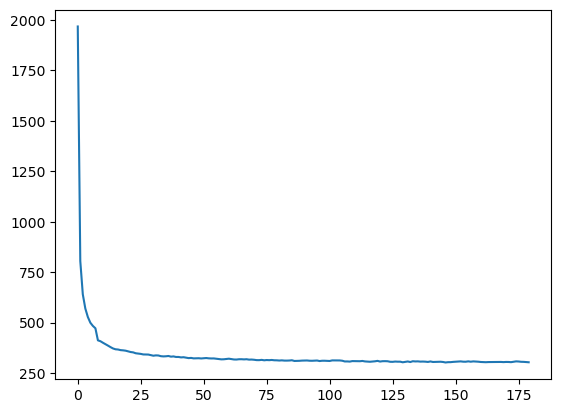

In [5]:
def main():
    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()

    N, D = Xtrain.shape
    
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    
    # initialize weights
    W = np.random.randn(D, 10) / np.sqrt(D)
    b = np.zeros(10)
    
    test_losses = []
    batch_sz = 500
    lr = 0.08
    reg = 0.
    n_batches = int(np.ceil(N / batch_sz))
    
    for i in range(20):
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)
        for j in range(n_batches):
            x = tmpX[j*batch_sz:(j + 1)*batch_sz,:]
            y = tmpY[j*batch_sz:(j + 1)*batch_sz,:]
            p_y = forward(x, W, b)
            
            # gradient descent
            current_batch_sz = len(x)
            gW = gradW(y, p_y, x) / current_batch_sz
            gb = gradb(y, p_y) / current_batch_sz
            
            W += lr*(gW - reg*W)
            b += lr*(gb - reg*b)
            
            if j%10 == 0:
                p_y_test = forward(Xtest, W, b)
                test_loss = cost(p_y_test, Ytest_ind)
                test_losses.append(test_loss)
                
    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    
    test_losses = np.array(test_losses)
    plt.plot(test_losses, label="test loss")
    plt.show()
    
main()

## 1-layer neural network with momentum

In [6]:
# define some helper functions
def forward(X, W1, b1, W2, b2):

    # relu
    Z = X.dot(W1) + b1
    Z[Z < 0] = 0

    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def derivative_w2(Z, T, Y):
    return Z.T.dot(Y - T)

def derivative_b2(T, Y):
    return (Y - T).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    return X.T.dot( ( ( Y-T ).dot(W2.T) * (Z > 0) ) ) # for relu

def derivative_b1(Z, T, Y, W2):
    return (( Y-T ).dot(W2.T) * (Z > 0)).sum(axis=0) # for relu

Reading in and transforming data...
Cost at iteration i=0, j=0: 2382.567127
Error rate: 0.91
Cost at iteration i=0, j=50: 360.316179
Error rate: 0.1
Cost at iteration i=1, j=0: 300.597132
Error rate: 0.087
Cost at iteration i=1, j=50: 260.058791
Error rate: 0.08
Cost at iteration i=2, j=0: 256.135117
Error rate: 0.07
Cost at iteration i=2, j=50: 232.808750
Error rate: 0.063
Cost at iteration i=3, j=0: 221.100002
Error rate: 0.057
Cost at iteration i=3, j=50: 206.914944
Error rate: 0.056
Cost at iteration i=4, j=0: 209.365585
Error rate: 0.058
Cost at iteration i=4, j=50: 184.562962
Error rate: 0.052
Cost at iteration i=5, j=0: 168.667318
Error rate: 0.049
Cost at iteration i=5, j=50: 176.465237
Error rate: 0.046
Cost at iteration i=6, j=0: 163.994754
Error rate: 0.045
Cost at iteration i=6, j=50: 154.595393
Error rate: 0.047
Cost at iteration i=7, j=0: 160.519241
Error rate: 0.046
Cost at iteration i=7, j=50: 171.061398
Error rate: 0.045
Cost at iteration i=8, j=0: 142.606969
Error rat

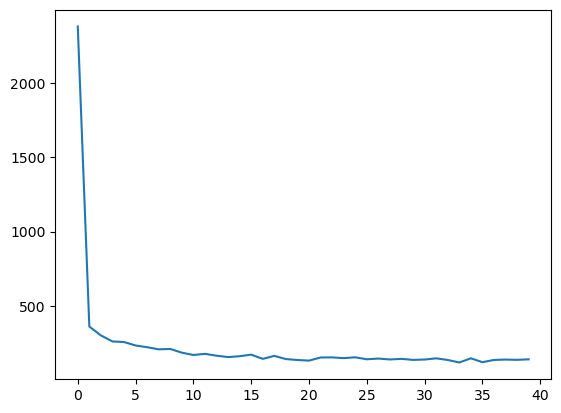

In [8]:
def main():
    max_iter = 20 
    print_period = 50
    
    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()
    lr = 0.00004
    reg = 0.01
    
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    
    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N // batch_sz
    
    M = 300
    K = 10
    W1 = np.random.randn(D, M) / np.sqrt(D)
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K) / np.sqrt(M)
    b2 = np.zeros(K)
    
    losses_momentum = []
    errors_momentum = []
    mu = 0.9
    dW2 = 0
    db2 = 0
    dW1 = 0
    db1 = 0
    
    for i in range(max_iter):
        Xtrain, Ytrain, Ytrain_ind = shuffle(Xtrain, Ytrain, Ytrain_ind)
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
            
            # gradients
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
            
            # update velocities
            dW2 = mu*dW2 - lr*gW2
            db2 = mu*db2 - lr*gb2
            dW1 = mu*dW1 - lr*gW1
            db1 = mu*db1 - lr*gb1
            
            # updates
            W2 += dW2
            b2 += db2
            W1 += dW1
            b1 += db1
            
            if j % print_period == 0:
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                loss = cost(pY, Ytest_ind)
                losses_momentum.append(loss)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, loss))

                e = error_rate(pY, Ytest)
                errors_momentum.append(e)
                print("Error rate:", e)
                
                
    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))
    plt.plot(losses_momentum, label="momentum")
    plt.show()
    
main()

## 1-layer neural network with Adam

Reading in and transforming data...
Cost at iteration i=0, j=0: 1809.152582
Error rate: 0.548
Cost at iteration i=0, j=10: 532.037435
Error rate: 0.149
Cost at iteration i=0, j=20: 359.559442
Error rate: 0.101
Cost at iteration i=0, j=30: 293.612185
Error rate: 0.078
Cost at iteration i=0, j=40: 254.826452
Error rate: 0.069
Cost at iteration i=0, j=50: 234.321619
Error rate: 0.065
Cost at iteration i=0, j=60: 205.179888
Error rate: 0.056
Cost at iteration i=0, j=70: 194.016408
Error rate: 0.055
Cost at iteration i=0, j=80: 175.192853
Error rate: 0.048
Cost at iteration i=1, j=0: 172.536881
Error rate: 0.047
Cost at iteration i=1, j=10: 175.231448
Error rate: 0.048
Cost at iteration i=1, j=20: 167.467185
Error rate: 0.048
Cost at iteration i=1, j=30: 162.098213
Error rate: 0.044
Cost at iteration i=1, j=40: 162.485745
Error rate: 0.041
Cost at iteration i=1, j=50: 160.727355
Error rate: 0.047
Cost at iteration i=1, j=60: 150.529440
Error rate: 0.042
Cost at iteration i=1, j=70: 147.6523

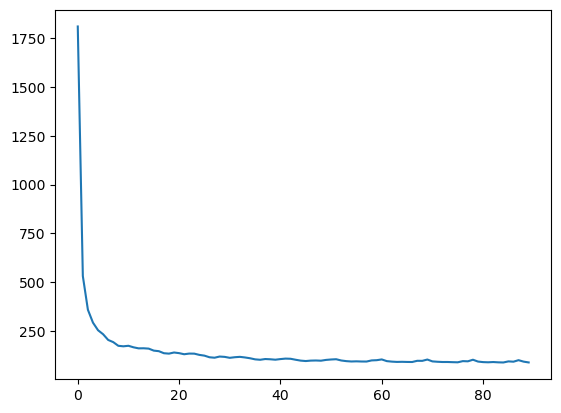

In [9]:

def main():
    max_iter = 10
    print_period = 10

    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()
    reg = 0.01

    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N // batch_sz
    
    M = 300
    K = 10
    W1 = np.random.randn(D, M) / np.sqrt(D)
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K) / np.sqrt(M)
    b2 = np.zeros(K)
    
    # 1st moment
    mW1 = 0
    mb1 = 0
    mW2 = 0
    mb2 = 0

    # 2nd moment
    vW1 = 0
    vb1 = 0
    vW2 = 0
    vb2 = 0
    
    # hyperparams
    lr0 = 0.001
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    
    # Adam
    loss_adam = []
    err_adam = []
    t = 1
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
            
            # updates
            # gradients
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
            
            # new m
            mW1 = beta1 * mW1 + (1 - beta1) * gW1
            mb1 = beta1 * mb1 + (1 - beta1) * gb1
            mW2 = beta1 * mW2 + (1 - beta1) * gW2
            mb2 = beta1 * mb2 + (1 - beta1) * gb2
            
            # new v
            vW1 = beta2 * vW1 + (1 - beta2) * gW1 * gW1
            vb1 = beta2 * vb1 + (1 - beta2) * gb1 * gb1
            vW2 = beta2 * vW2 + (1 - beta2) * gW2 * gW2
            vb2 = beta2 * vb2 + (1 - beta2) * gb2 * gb2
            
            # bias correction
            correction1 = 1 - beta1 ** t
            hat_mW1 = mW1 / correction1
            hat_mb1 = mb1 / correction1
            hat_mW2 = mW2 / correction1
            hat_mb2 = mb2 / correction1

            correction2 = 1 - beta2 ** t
            hat_vW1 = vW1 / correction2
            hat_vb1 = vb1 / correction2
            hat_vW2 = vW2 / correction2
            hat_vb2 = vb2 / correction2
            
            # update t
            t += 1
            
            # update params
            W1 = W1 - lr0 * hat_mW1 / (np.sqrt(hat_vW1) + eps)
            b1 = b1 - lr0 * hat_mb1 / (np.sqrt(hat_vb1) + eps)
            W2 = W2 - lr0 * hat_mW2 / (np.sqrt(hat_vW2) + eps)
            b2 = b2 - lr0 * hat_mb2 / (np.sqrt(hat_vb2) + eps)
            
            if j % print_period == 0:
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                l = cost(pY, Ytest_ind)
                loss_adam.append(l)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

                err = error_rate(pY, Ytest)
                err_adam.append(err)
                print("Error rate:", err)
                
    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))
    plt.plot(loss_adam, label="Adam")
    plt.show()

            
main()        
            